In [4]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK, Roots;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
1e25, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e1, # Field (V.cm^-1)
1e13, # Base electron jump rate
-24, # Fermi level (J)
3.87, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
150e-7
);

T = 300;

In [5]:
p() = quadgk(
    r -> Conduction.DOS(semiconductor, r, T) * Conduction.F(semiconductor, r, T) * Conduction.k * T,
    -Inf,
    Inf
)[1];

function quantityCarrier(x)
    semiconductor.Ni = x;
    return p()
end

function find_multiple_zeros(x)
    res = (r -> find_zero(x -> quantityCarrier(x) - r, 1e20)).(range)
    return res
end

range = vcat([[1, 4, 7] * 10^i for i in 10:1:17]...);

array_Ni = find_multiple_zeros(range)

24-element Array{Float64,1}:
 1.508573620973858e17
 6.034294483895432e17
 1.0560015346817006e18
 1.5085736209738578e18
 6.034294483895431e18
 1.0560015346817008e19
 1.5085736209738578e19
 6.034294483895431e19
 1.0560015346817006e20
 1.5085736209738577e20
 6.034294483895432e20
 1.0560015346817006e21
 1.508573620973858e21
 6.034294483895431e21
 1.0560015346817005e22
 1.508573620973858e22
 6.0342944838954315e22
 1.0560015346817005e23
 1.508573620973858e23
 6.034294483895432e23
 1.0560015346817004e24
 1.5085736209738583e24
 6.034294483895433e24
 1.0560015346817007e25

In [6]:
res = [];

for i in array_Ni
    semiconductor.Ni = i;
    r = Conduction.overallEin(semiconductor, Conduction.RnnVRH, T,  20) / (Conduction.k * T / Conduction.q);
    append!(res, r);
end

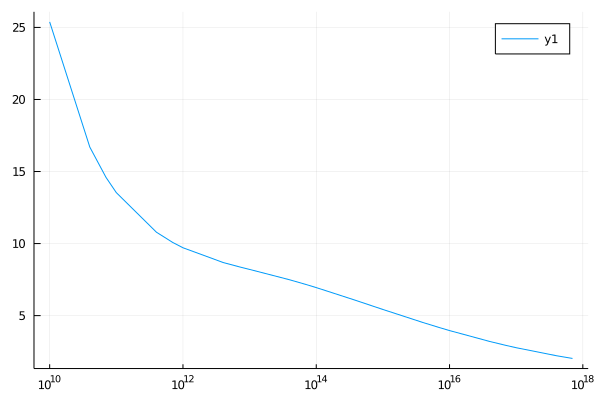

In [7]:
plot(reverse(range), reverse(res), xaxis=:log)

In [10]:

range = vcat([[1, 2, 3, 4, 5, 6, 7, 8, 9] * 10^i for i in 15:1:17]...);

array_Ni = find_multiple_zeros(range);

In [11]:
res = [];

for i in array_Ni
    semiconductor.Ni = i;
    r = Conduction.overallEin(semiconductor, Conduction.RnnVRH, T,  20) / (Conduction.k * T / Conduction.q);
    append!(res, r);
end

In [ ]:
plot(reverse(range), reverse(res), xaxis=:log)